In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [220]:
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

In [221]:
df = pd.read_csv("./Data/crypto-markets.csv")
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [222]:
# printng the latest currency
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
latest = df[df['date'] == max(df['date'])]
latest.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
1744,bitcoin,BTC,Bitcoin,2018-02-05,1,8270.540000,8364.840000,6756.680000,6955.270000,9285290000,139325000000,0.1235,1608.16
2658,ethereum,ETH,Ethereum,2018-02-05,2,834.960000,856.650000,644.600000,697.950000,4269530000,81337400000,0.2516,212.05
4305,ripple,XRP,Ripple,2018-02-05,3,0.825943,0.833866,0.675827,0.691799,1286180000,32219400000,0.1011,0.16
4503,bitcoin-cash,BCH,Bitcoin Cash,2018-02-05,4,1159.890000,1172.700000,839.950000,887.410000,568117000,19659800000,0.1426,332.75
4631,cardano,ADA,Cardano,2018-02-05,5,0.385044,0.399523,0.319646,0.327371,658548000,9983060000,0.0967,0.08


In [223]:
# listing the number of cryptos listed
latest['symbol'].nunique()

1461

In [224]:
#listing the top 10 cryptos

latest[latest['ranknow'] <= 10].groupby('ranknow').name.unique()
latest = latest[['name', 'market', 'volume']].head(10)
latest.head()

,name,market,volume
1744,Bitcoin,139325000000,9285290000
2658,Ethereum,81337400000,4269530000
4305,Ripple,32219400000,1286180000
4503,Bitcoin Cash,19659800000,568117000
4631,Cardano,9983060000,658548000


In [225]:
# now creating a fucntion to plot and compare
import matplotlib.pyplot as plt

def plot(x,y, label):
    fig = plt.figure(figsize = (10,5))
    plt.barh(x, y, color = 'lightblue')
    plt.title("Top 10 Crypto Market Values")
    plt.xlabel(label)
    plt.ylabel("Cryptocurrencies")
    plt.show()

#### Finding Market value of crypto

Obtained by multiplying the circulating supply of coins by the current coin price

In [226]:
currency = []
market_value =[]
for i in latest['name']:
    currency.append(i)
for m in latest['market']:
    market_value.append(m)

In [227]:
currency, market_value

(['Bitcoin',
  'Ethereum',
  'Ripple',
  'Bitcoin Cash',
  'Cardano',
  'Litecoin',
  'NEO',
  'Stellar',
  'EOS',
  'NEM'],
 [139325000000,
  81337400000,
  32219400000,
  19659800000,
  9983060000,
  8190580000,
  6992380000,
  7064590000,
  5618380000,
  4940820000])

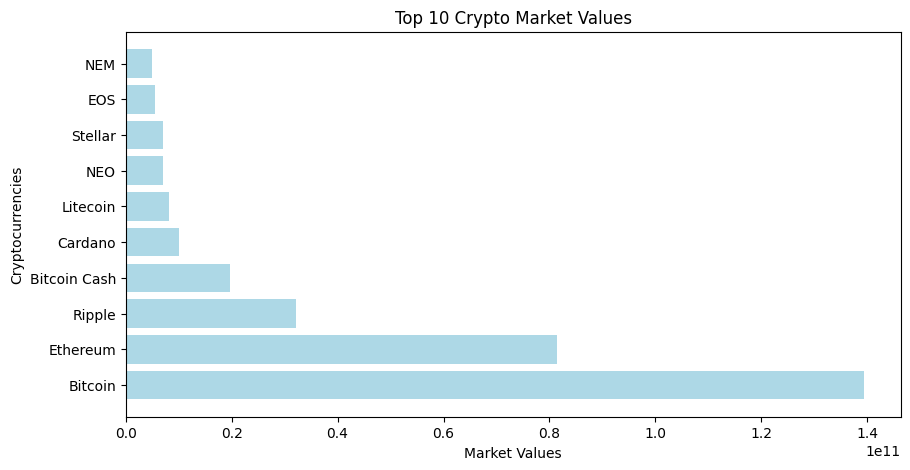

In [228]:
plot(currency, market_value, "Market Values")

#### Volume

A measure of how much of a given financial asset has been traded in a given period of time

In [229]:
volume = []
for v in latest['volume']:
    volume.append(v)
volume

[9285290000,
 4269530000,
 1286180000,
 568117000,
 658548000,
 844678000,
 312096000,
 339507000,
 640159000,
 28590400]

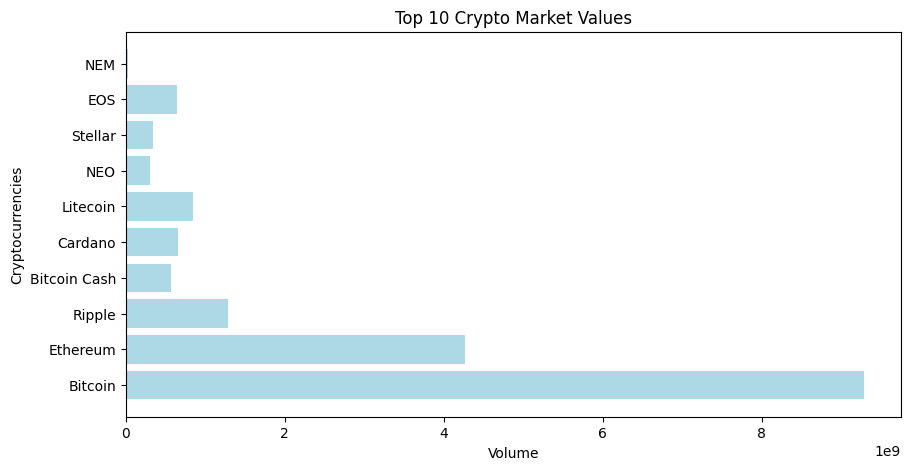

In [230]:
plot(currency,volume, "Volume")

#### Candlestick Charts

Easy interpretation of price action

In [231]:
'''
Let's take input from the user to specifically show the crypto chart from
the top 10 listed
'''
latest

,name,market,volume
1744,Bitcoin,139325000000,9285290000
2658,Ethereum,81337400000,4269530000
4305,Ripple,32219400000,1286180000
4503,Bitcoin Cash,19659800000,568117000
4631,Cardano,9983060000,658548000
6376,Litecoin,8190580000,844678000
6891,NEO,6992380000,312096000
8172,Stellar,7064590000,339507000
8392,EOS,5618380000,640159000
9434,NEM,4940820000,28590400


In [232]:
def candlestick(rank,month):
    name = df[df.ranknow == rank].iloc[-1]['name']
    f = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days = 30*month)))]
    OHLCf = f[['date', 'open', 'high', 'low', 'close']]
    OHLCf['date'] = mdates.date2num(OHLCf['date'].dt.date)
    return name, OHLCf

In [233]:
def candleplot(name, OHLCf):
    f,ax=plt.subplots(figsize=(15,11))
    ax.xaxis_date()
    candlestick_ohlc(ax, OHLCf.values, width=0.5, colorup='g', colordown='r',alpha=0.75)

    plt.xlabel("Date")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.title(name + " price")
    plt.ylabel("Price")
    plt.show()

In [239]:
rank = int(input("Enter the rank of the Crypto stock you want to vizualize: "))
month = int(input("Enter the number of months you want to analyze the stock: "))

C:\Users\annar\AppData\Local\Temp\ipykernel_10988\3772477066.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OHLCf['date'] = mdates.date2num(OHLCf['date'].dt.date)


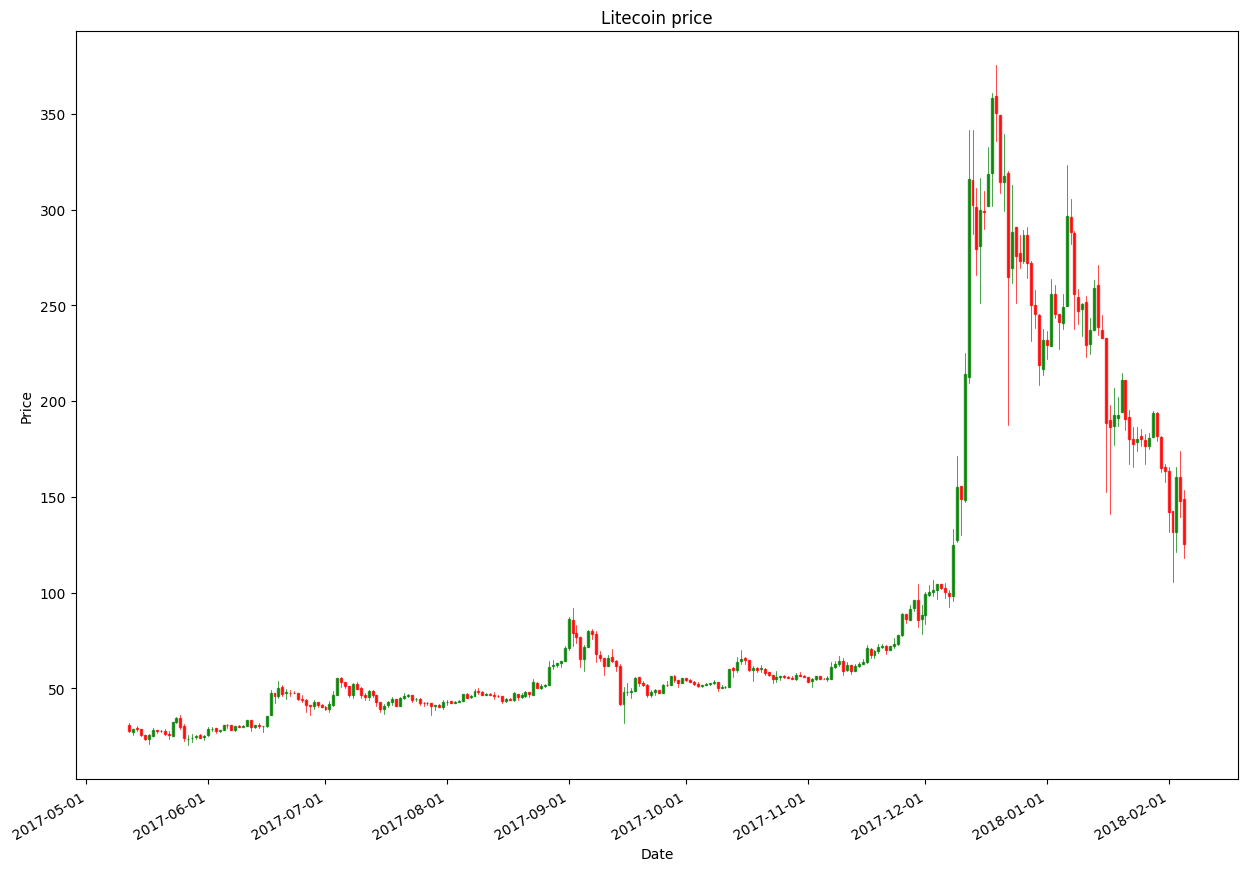

In [240]:
name, OHLCf = candlestick(rank,month)
candleplot(name, OHLCf)

#### Moving Averages

We shall take this algorithm from our Cryptocurrency Trading Algorithm repository


In [236]:
'''
def SMA():
    df['Signal'] = 0.0
    df['Signal'] = np.where(df['SMA_30'] > df['SMA_300'], 1.0, 0.0)   
    df['Position'] = df['Signal'].diff()

    fig, ax = plt.subplots(dpi=500)
    ax.tick_params(axis='x', labelsize=8)

    ax.plot(df.index, df['close'], label='Closing Price')
    ax.plot(df['SMA_30'].index, df['SMA_30'] , label='30-day SMA')
    ax.plot(df['SMA_300'].index, df['SMA_300'] , label='300-day SMA')

    ax.plot(df.loc[df['Position']==1.0].index, df.SMA_30[df['Position'] == 1.0],marker=6, ms=4, linestyle='none', color='green')

    # Adding red arrows to indicate sell orders
    ax.plot(df.loc[df['Position'] == -1.0].index, df.SMA_30[df['Position'] == -1.0],
    marker=7, ms=4, linestyle='none', color='red')

    ax.legend()
    plt.show()
'''

"\ndef SMA():\n    df['Signal'] = 0.0\n    df['Signal'] = np.where(df['SMA_30'] > df['SMA_300'], 1.0, 0.0)   \n    df['Position'] = df['Signal'].diff()\n\n    fig, ax = plt.subplots(dpi=500)\n    ax.tick_params(axis='x', labelsize=8)\n\n    ax.plot(df.index, df['close'], label='Closing Price')\n    ax.plot(df['SMA_30'].index, df['SMA_30'] , label='30-day SMA')\n    ax.plot(df['SMA_300'].index, df['SMA_300'] , label='300-day SMA')\n\n    ax.plot(df.loc[df['Position']==1.0].index, df.SMA_30[df['Position'] == 1.0],marker=6, ms=4, linestyle='none', color='green')\n\n    # Adding red arrows to indicate sell orders\n    ax.plot(df.loc[df['Position'] == -1.0].index, df.SMA_30[df['Position'] == -1.0],\n    marker=7, ms=4, linestyle='none', color='red')\n\n    ax.legend()\n    plt.show()\n"

In [237]:
def SMA(rank,months):
    name = df[df.ranknow == rank].iloc[-1]['name']
    filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

    filtered_df.set_index('date', inplace=True)

    f, ax = plt.subplots(figsize=(15,11))
    filtered_df.close.plot(label='Raw', ax=ax)
    filtered_df.close.rolling(20).mean().plot(label='20D MA', ax=ax)
    filtered_df.close.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)', ax=ax)

    plt.title(name + " price with Moving Averages")
    plt.legend()
    plt.xlabel("Date")
    plt.gcf().autofmt_xdate()
    plt.ylabel("Close ($)")
    plt.show()

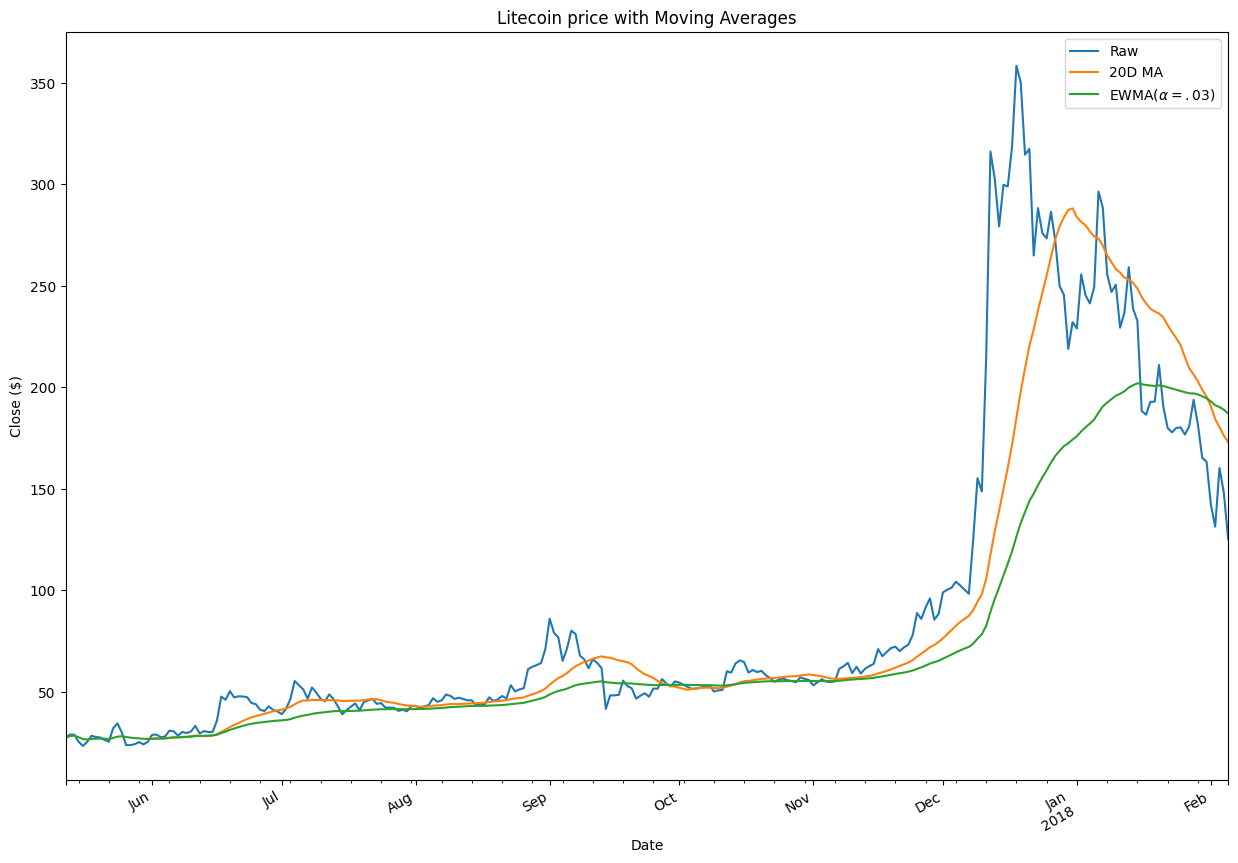

In [241]:
SMA(rank,month)